In [1]:
import numpy as np
import matplotlib.pyplot as plt

### geometric distribution I

with parameter $$p$$ and $$1-p$$ when will it reach the limmite

In [2]:
u=0.8
s=0.4
q=1-s
i=1
t=0

while(u>t):
    t+=s
    s*=q
    i+=1
    print(s,t,i)

0.24 0.4 2
0.144 0.64 3
0.08639999999999999 0.784 4
0.05183999999999999 0.8704000000000001 5


In [3]:
u=0.8
p=0.1
s=p
data=np.zeros((220))
data[0]=0
for i in range(220):
    data[i]=data[i-1]+s
    s*=(1-p)

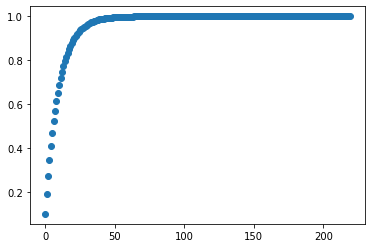

In [4]:
plt.scatter([i for i in range(220)],data)

to predict how long should we go to find the answer of a geometry distribution

In [5]:
U=0.9
q=0.9
int(np.ceil(np.log(1-U)/np.log(q)))

22

### grouping randoms

in here we just assume that we just group the data in two group with a p probablity than get it in to a random between 0,1

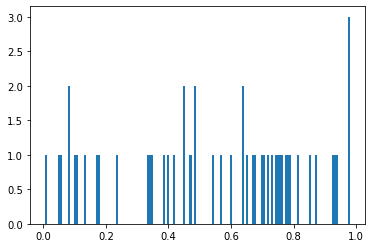

In [6]:
p=0.0001
k=np.zeros((50))
for i in range(50):
    a = np.random.rand((1))
    if(a<p):
        k[i]=a/p
    else:
        k[i]=(a-p)/(1-p)
plt.hist(k,bins= 150)
plt.show()

### Poisson

make a uniform variable u than make $$p_{0}+p_{1}+p_{2}+... $$ to first u that is bigger than u

In [7]:
sum=0
u=np.random.random()
lambda__=15
p=np.power(np.e,-lambda__)
for i in range(1,30):
    sum+=p
    p/=(i/lambda__)
    print(i,"poasion value",p,"total",sum)

1 poasion value 4.588534807527391e-06 total 3.0590232050182605e-07
2 poasion value 3.441401105645543e-05 total 4.894437128029217e-06
3 poasion value 0.00017207005528227715 total 3.930844818448465e-05
4 poasion value 0.0006452627073085393 total 0.0002113785034667618
5 poasion value 0.001935788121925618 total 0.0008566412107753011
6 poasion value 0.004839470304814045 total 0.002792429332700919
7 poasion value 0.01037029351031581 total 0.007631899637514964
8 poasion value 0.019444300331842142 total 0.018002193147830775
9 poasion value 0.0324071672197369 total 0.03744649347967292
10 poasion value 0.04861075082960536 total 0.06985366069940982
11 poasion value 0.0662873874949164 total 0.11846441152901518
12 poasion value 0.08285923436864549 total 0.18475179902393157
13 poasion value 0.09560680888689864 total 0.2676110333925771
14 poasion value 0.10243586666453426 total 0.36321784227947573
15 poasion value 0.10243586666453426 total 0.46565370894401
16 poasion value 0.09603362499800087 total 0

find value in poisson variables for a sepecific number

In [8]:
lambda_=40
a=np.zeros((40*10))
a[0]=np.power(np.e,-lambda_)
p=a[0]
for i in range(1,40*10):
    a[i]=a[i-1]+(p)
    p/=(i/lambda_)

it's hard to go on aloop with a big lambda so we can calculate the $$ S_{n}=\sum_{i=0}^{n} p_{i}$$

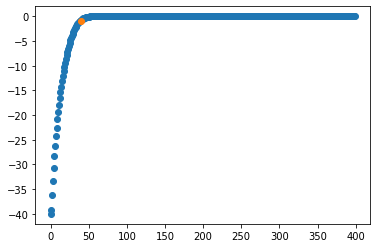

In [9]:
plt.scatter([i for i in range(40*10)],np.log(a))
plt.scatter([40],np.log(a[39]))

In [10]:
a[-1]

1.0000000000000018

out of computer caluculation

In [11]:
40*10-np.array(a[a==a[-1]]).shape[0]

103

In [12]:
a[300]

1.0000000000000018

it's obvies that we can start search from lambda and move forward or backward o find good model

### Acceptance-Rejection

we just uniformlu make a probablity of every search that if the random variable in the p[i] range is or not

p~q distribution we generate in q than with probability pi/cqi we accept the sample 

In [13]:
n=1000
s=np.zeros((n))
p=np.zeros(5)
p[0]=0.21
p[1]=0.22
p[2]=0.19
p[3]=0.18
p[4]=0.2

In [14]:
c=p.max()/(1/5)
for i in range(n):
    b=True
    while(b):
        a=np.random.randint(5)
        d=np.random.random()
        if(d<(p[a]/c)):
            b=False
            s[i]=a+1

(array([191.,   0., 245.,   0.,   0., 197.,   0., 184.,   0., 183.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

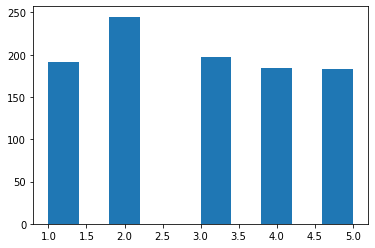

In [15]:
plt.hist(s)

In [16]:
for i in range(1,6):
    print("the number of " ,i," is" ,np.array(s[s==i]).shape[0]/n,"persent and we expect",p[i-1])

the number of  1  is 0.191 persent and we expect 0.21
the number of  2  is 0.245 persent and we expect 0.22
the number of  3  is 0.197 persent and we expect 0.19
the number of  4  is 0.184 persent and we expect 0.18
the number of  5  is 0.183 persent and we expect 0.2


### Composition and Alias method

it is a method for the make random variable in the range of p with p probabliry but we know that makeing decition betwin two variable is easy so we make them in to p size group on probablity with the chois betwean two variable

In [17]:
p=np.random.rand((100))
p=p/p.sum()

In [18]:
new_p=p*10000

In [19]:
q=np.zeros((99*2),dtype='int')
alpha=np.zeros((99))

here we make them in to groups

In [20]:
for i in range(99):
    minimom=1
    maximom=0
    for j in range(100):
        if(p[j]<minimom and p[j]!=0):
            a=j
            minimom=p[j]
        if(p[j]>maximom):
            b=j
            maximom=p[j]
    
    q[2*i]=a
    q[2*i+1]=b
    alpha[i]=p[p!=0].min()*99
    p[a]=0
    p[b]-=(1-alpha[i])/99

and here we make predictions

In [21]:
s=np.zeros((10000))
for i in range(10000):
    a=int(np.random.random()*99)
    b=np.random.random()
    if(alpha[a]<b):
        s[i]=q[2*a]
    else:
        s[i]=q[2*a+1]

<BarContainer object of 100 artists>

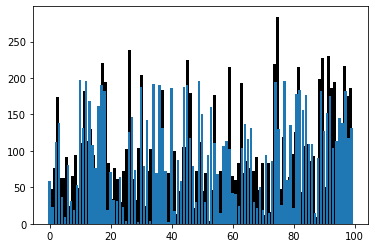

In [22]:
plt.hist(s,bins=100,color='black')
plt.bar([i for i in range(100)],new_p)

### Multinomial

we apply a n samlple of a process with probablility $$ p_{1},...p_{r}$$ with result $$1,...r $$

so we use for on r vaibel that we get ni of result i with binery $$ (n-\sum_{j=0 }^{i-1} n_{j},\frac{p_{i}}{1-\sum_{j=0}^{i-1} p_{j} } )$$

In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def binery(n,p):
    t=0
    for i in range(n):
        if(np.random.random()<p):
            t+=1
    return t

In [25]:
def result(r,n):
    k=1;
    p=np.ones((r))
    p/=r
    for i in range(r):
        dic[i]=binery(n,p[i]/k)
        k-=p[i]
        n-=dic[i]

In [26]:
r=1000
n=100

In [27]:
dic={}
result(r,n)

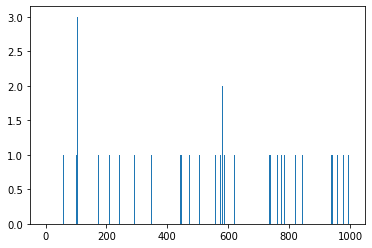

In [28]:
plt.bar([i for i in range(r)],dic.values())
plt.show()

In [29]:
n=1000
r=100

In [30]:
dic={}
result(r,n)

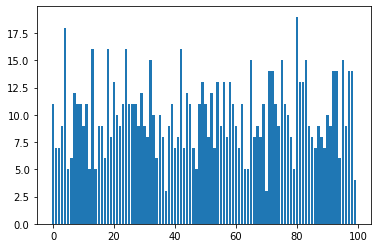

In [31]:
plt.bar([i for i in range(r)],dic.values())
plt.show()

### Continous RV-inverse function

In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
def exp(lamabda):
    return -np.log2(np.random.random())/lamabda

In [34]:
lmbda=20

In [35]:
A=np.zeros((10000))
for i in range(A.shape[0]):
    A[i]=exp(lmbda)

(array([1.059e+03, 9.860e+02, 8.960e+02, 7.480e+02, 6.710e+02, 6.040e+02,
        5.430e+02, 4.920e+02, 4.380e+02, 3.880e+02, 3.250e+02, 3.020e+02,
        2.860e+02, 2.450e+02, 2.330e+02, 1.740e+02, 1.670e+02, 1.460e+02,
        1.140e+02, 1.220e+02, 1.210e+02, 1.020e+02, 8.000e+01, 8.300e+01,
        8.000e+01, 5.300e+01, 4.500e+01, 6.600e+01, 4.000e+01, 4.000e+01,
        3.800e+01, 3.100e+01, 3.800e+01, 2.700e+01, 2.800e+01, 2.100e+01,
        2.400e+01, 2.500e+01, 1.100e+01, 1.400e+01, 9.000e+00, 9.000e+00,
        6.000e+00, 9.000e+00, 3.000e+00, 5.000e+00, 5.000e+00, 2.000e+00,
        7.000e+00, 6.000e+00, 4.000e+00, 5.000e+00, 2.000e+00, 0.000e+00,
        4.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 4.000e+00, 2.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

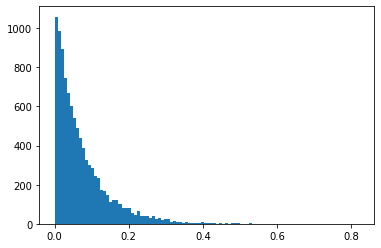

In [36]:
plt.hist(A,bins=100)

In [37]:
lmbda=20

In [38]:
def pois(lmbda):
    t=-1;
    s=1
    while(s>np.power(np.e,-lmbda)):
        t+=1
        s*=np.random.random()
    return t

In [39]:
A=np.zeros((10000))
for i in range(A.shape[0]):
    A[i]=pois(lmbda)

(array([  1.,   0.,   2.,   0.,   0.,  11.,   0.,   0.,  10.,   0.,   0.,
         40.,   0.,  47.,   0.,   0.,  91.,   0.,   0., 151.,   0.,   0.,
        241.,   0.,   0., 389.,   0., 560.,   0.,   0., 656.,   0.,   0.,
        792.,   0.,   0., 855.,   0., 920.,   0.,   0., 889.,   0.,   0.,
        858.,   0.,   0., 717.,   0.,   0., 665.,   0., 562.,   0.,   0.,
        411.,   0.,   0., 322.,   0.,   0., 253.,   0., 206.,   0.,   0.,
        126.,   0.,   0.,  86.,   0.,   0.,  58.,   0.,   0.,  25.,   0.,
         26.,   0.,   0.,  11.,   0.,   0.,   9.,   0.,   0.,   3.,   0.,
          1.,   0.,   0.,   4.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 5.  ,  5.36,  5.72,  6.08,  6.44,  6.8 ,  7.16,  7.52,  7.88,
         8.24,  8.6 ,  8.96,  9.32,  9.68, 10.04, 10.4 , 10.76, 11.12,
        11.48, 11.84, 12.2 , 12.56, 12.92, 13.28, 13.64, 14.  , 14.36,
        14.72, 15.08, 15.44, 15.8 , 16.16, 16.52, 16.88, 17.24, 17.6 ,
        17.96, 18.32, 18.68, 19.04

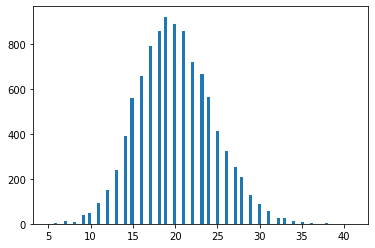

In [40]:
plt.hist(A,bins=100)

### Gamma

we generate gamma distrebution $$ gamma(n,lambda) = \sum_{i=0}^{n} x_{i} $$ which x_i is in exponentioal destribution

In [41]:
import datetime

In [42]:
def gamma(n,lmbda):
    s=1
    for i in range(n):
        s*=np.random.random()
    return -np.log2(s)/lmbda

In [43]:
def test_gamma(n,lmbda):
    s=0
    for i in range(n):
        s+=np.log2(np.random.random())
    return -s/lmbda

In [44]:
n=100
lmbda=20

In [45]:
A=np.zeros((100000))
tick=datetime.datetime.now()
for i in range(A.shape[0]):
    A[i]=gamma(n,lmbda)
tock=datetime.datetime.now()

In [46]:
tock-tick

datetime.timedelta(seconds=4, microseconds=91807)

In [47]:
A=np.zeros((100000))
tick=datetime.datetime.now()
for i in range(A.shape[0]):
    A[i]=test_gamma(n,lmbda)
tock=datetime.datetime.now()

In [48]:
tock-tick

datetime.timedelta(seconds=14, microseconds=506346)

(array([  1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   2.,   2.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   2.,   0.,   1.,
          1.,   1.,   0.,   1.,   1.,   0.,   2.,   1.,   0.,   0.,   2.,
          2.,   0.,   1.,   1.,   1.,   1.,   0.,   0.,   0.,   1.,   3.,
          0.,   1.,   1.,   4.,   1.,   1.,   0.,   0.,   1.,   5.,   2.,
          3.,   0.,   0.,   2.,   2.,   3.,   2.,   1.,   0.,   3.,   2.,
          0.,   1.,   6.,   2.,   3.,   3.,   4.,   1.,   2.,   3.,   1.,
          6.,   4.,   4.,  11.,  10.,   5.,   6.,   6.,   7.,   4.,   3.,
          4.,   2.,   5.,  12.,   8.,   9.,   8.,   8.,  10.,   5.,  10.,
         14.,  14.,   6.,  12.,   7., 

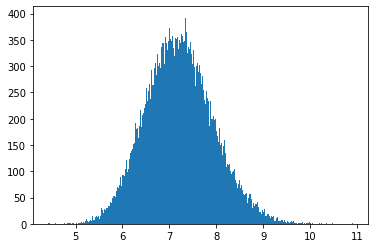

In [49]:
plt.hist(A,bins=1000)

### Acceptance Rejection

making normal bistribution bu using exponentioal disribution

In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
def normal(n):
    A=np.zeros((n))
    for i in range(n):
        b=False
        while(not b):
            x=np.random.exponential()
            a=np.power(np.e,-((x-1)**2)/2)
            if(a>np.random.random()):
                b=True
                if(np.random.random()>0.5):
                    A[i]=x
                else:
                    A[i]=-x
    return A

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   1.,   0.,
          1.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   2.,
          1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,
          0.,   0.,   0.,   1.,   1.,   0.,   1.,   0.,   1.,   0.,   1.,
          2.,   0.,   0.,   0.,   1.,   1.,   2.,   2.,   1.,   1.,   1.,
          2.,   4.,   1.,   1.,   2.,   1.,   1.,   2.,   1.,   4.,   2.,
          0.,   0.,   1.,   1.,   1.,   2.,   4.,   2.,   1.,   2.,   3.,
          0.,   2.,   1.,   0.,   1.,   4.,   2.,   2.,   4.,   3.,   1.,
          3.,   3.,   1.,   3.,   6.,   3.,   1.,   1.,   2.,   4.,   2.,
          1.,   3.,   9.,   6.,   4.,   2.,   5.,   4.,   2.,   4.,   2.,
          3.,   5.,   2.,   1.,   4.,   7.,   3.,   8.,   6.,   5.,   4.,
          8.,   7.,   6.,  10.,   2., 

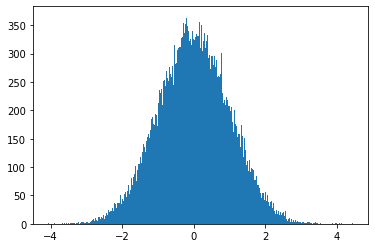

In [52]:
A=normal(100000)
plt.hist(A,bins=1000)

### Normal Distribution via polar method

$$N(\mu,\sigma) = \sqrt {r}\sin{(2\pi*teta)} ,\sqrt{r}\cos{(2\pi*teta)}$$ which teta is uniform and r is exponential with parameter $$\frac{1}{2}$$

In [53]:
A=np.zeros((100000))
tick=datetime.datetime.now()
for i in range(50000):
    teta=2*np.pi*np.random.random()
    r=-2*np.log(np.random.random())
    A[2*i]=np.sqrt(r)*np.cos(teta)
    A[2*i+1]=np.sqrt(r)*np.sin(teta)
tock=datetime.datetime.now()

In [54]:
tock-tick

datetime.timedelta(microseconds=401247)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   1.,   1.,   0.,
          2.,   1.,   1.,   1.,   0.,   1.,   0.,   1.,   0.,   2.,   3.,
          2.,   0.,   3.,   0.,   2.,   2.,   2.,   1.,   3.,   2.,   1.,
          1.,   3.,   1.,   1.,   2.,   2.,   0.,   4.,   5.,   4.,   2.,
          2.,   2.,   2.,   2.,   5.,   3.,   9.,   6.,   5.,   6.,   7.,
          2.,   6.,  10.,   8.,   9.,   6.,   9.,   6.,   5.,   9.,  15.,
          6.,  13.,  14.,  15.,  12.,  11.,  11.,  15.,  20.,  20.,  18.,
         24.,  19.,  22.,  28.,  24.,  18.,  22.,  34.,  27.,  33.,  30.,
         28.,  35.,  38.,  39.,  46.,  42.,  35.,  49.,  34.,  48.,  50.,
         52.,  55.,  53.,  57.,  56.,  69.,  77.,  60.,  69.,  60.,  82.,
         70.,  76., 100.,  80., 101., 

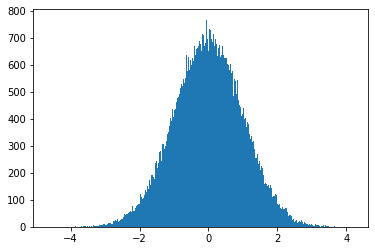

In [55]:
plt.hist(A,bins=500)

In [56]:
A=np.zeros((100000))
tick=datetime.datetime.now()

for i in range(50000):
    b=False
    while(not b):
        v1=np.random.random()*2-1
        v2=np.random.random()*2-1
        if(v1*v1+v2*v2<1):
            r=-2*np.log(np.random.random())
            A[2*i]=np.sqrt(r/(v1*v1+v2*v2))*v1
            A[2*i+1]=np.sqrt(r/(v1*v1+v2*v2))*v2
            b=True
tock=datetime.datetime.now()

In [57]:
tock-tick

datetime.timedelta(microseconds=438770)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,
          0.,   0.,   0.,   1.,   0.,   1.,   1.,   0.,   1.,   0.,   1.,
          0.,   0.,   0.,   0.,   1.,   1.,   2.,   1.,   2.,   1.,   4.,
          1.,   2.,   2.,   3.,   2.,   2.,   1.,   4.,   2.,   3.,   3.,
          6.,   1.,   3.,   6.,   5.,   6.,   4.,   4.,   3.,   5.,   5.,
          6.,   6.,   5.,   4.,   5.,   6.,   9.,   5.,  10.,   7.,  12.,
         15.,  13.,  16.,  13.,  22.,  12.,  13.,  12.,  18.,  21.,  21.,
         10.,  21.,  24.,  22.,  24.,  18.,  24.,  19.,  16.,  36.,  27.,
         25.,  35.,  34.,  39.,  41.,  40.,  57.,  45.,  51.,  50.,  55.,
         62.,  63.,  49.,  66.,  68.,  72.,  60.,  77.,  71.,  67.,  82.,
         71.,  93.,  92.,  83., 101.,  87., 103., 105., 111., 117., 119.,
        112., 126., 139., 128., 125., 142., 149., 149., 164., 149., 172.,
        179., 195., 181., 175., 175., 213., 212., 215., 219., 216., 220.,
        241., 247., 286., 241., 236., 

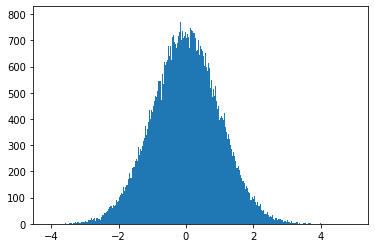

In [58]:
plt.hist(A,bins=500)

### Homogeneous Poisson Process

In [59]:
T=10
lambda_=1

In [60]:
tick=datetime.datetime.now()
s=0
k=[]
while(s<T):
    s+=np.random.exponential(lambda_)
    k.append(s)
tack=datetime.datetime.now()

In [61]:
tack-tick

datetime.timedelta(microseconds=310)

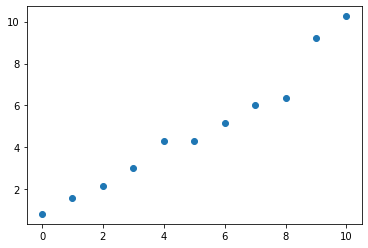

In [62]:
plt.scatter([i for i in range(np.array(k).shape[0])],k)

In [63]:
tick=datetime.datetime.now()
k=[]
s=0
for i in range(np.random.poisson(T*lambda_)):
    k.append(T*np.random.random())
tack=datetime.datetime.now()

In [64]:
tack-tick

datetime.timedelta(microseconds=311)

In [65]:
k.sort()

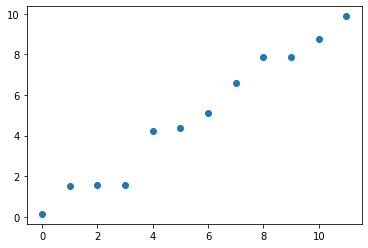

In [66]:
plt.scatter([i for i in range(np.array(k).shape[0])],k)

### Non-homogeneous Poisson Process 

### Thining

when we have a poisson process with diffrent lambda all over the time 

so we get a $$\lambda_{0} $$ and for S_i  and with probability $$\frac{\lambda(S_{i})}{\lambda_{0}}$$ we save  $S_{i}$

In [67]:
def lambda_(t):
    return 10+t

In [68]:
def dotes(T):
    dotes=[]
#     here we should make lambda_0 be the maximom of lambda_
    lambda_0=20
    t=np.random.exponential(lambda_0)
    while(t<T):
        u=np.random.random()
        if(u<=(lambda_(t)/lambda_0)):
            dotes.append(t)
        t+=np.random.exponential(lambda_0)
    return dotes    

In [69]:
dic=[]
for x in range(100000):
    a=np.array(dotes(10))
    for i in range(a.size):
        dic.append(a[i])

(array([239., 241., 271., 263., 249., 252., 269., 268., 283., 301., 260.,
        264., 296., 270., 267., 278., 312., 299., 291., 313., 313., 310.,
        293., 326., 283., 339., 326., 327., 293., 340., 330., 314., 300.,
        316., 354., 326., 292., 355., 365., 355., 367., 327., 363., 376.,
        336., 361., 346., 364., 333., 379., 373., 379., 374., 368., 389.,
        360., 410., 379., 397., 404., 428., 411., 425., 399., 437., 402.,
        416., 403., 431., 438., 412., 477., 437., 426., 389., 430., 450.,
        457., 469., 415., 455., 462., 489., 485., 432., 462., 464., 432.,
        489., 465., 468., 447., 517., 484., 492., 516., 486., 481., 499.,
        462.]),
 array([9.13452003e-05, 1.00089357e-01, 2.00087368e-01, 3.00085380e-01,
        4.00083391e-01, 5.00081402e-01, 6.00079414e-01, 7.00077425e-01,
        8.00075437e-01, 9.00073448e-01, 1.00007146e+00, 1.10006947e+00,
        1.20006748e+00, 1.30006549e+00, 1.40006351e+00, 1.50006152e+00,
        1.60005953e+00, 1.7000

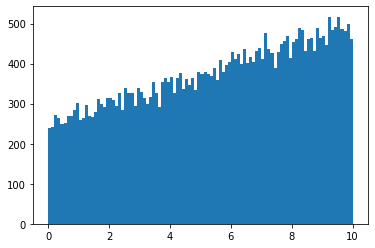

In [70]:
plt.hist(dic,bins=100)

In [71]:
np.array(dic).size/100000

0.37367

### Poisson process in 2D 

In [72]:
R=15
lambda_=3

In [73]:
dotes=[]
X_Y=[]
s=0
while(s<np.pi*R*R):
    s+=np.random.exponential(lambda_)
    teta=np.random.random()*2*np.pi
    r=np.sqrt(s/np.pi)
    dotes.append([r,teta])
    X_Y.append([r*np.sin(teta),r*np.cos(teta)])

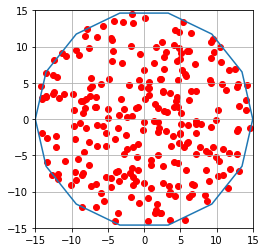

In [74]:
theta = np.linspace(0, 2*np.pi, R)

x1 = R*np.cos(theta)
x2 = R*np.sin(theta)

fig, ax = plt.subplots(1)

ax.plot(x1, x2)
ax.set_aspect(1)

plt.xlim(-R,R)
plt.ylim(-R,R)

plt.grid(linestyle='-')

plt.scatter(np.array(X_Y)[:,0],np.array(X_Y)[:,1],color='r')

### single server

In [75]:
def singel(mu,sigma,T,Lambda):
    t=0
    arrivel=[]
    while(t<T):
        t+=np.random.exponential(Lambda)
        s=np.random.normal(mu,sigma)
        arrivel.append([t,s])
    arrivel=np.array(arrivel)
    person=np.zeros(arrivel.shape)
    t=0
    for i in range(arrivel.shape[0]):
        if(t<T):
            if(t<=arrivel[i,0]):
                t=arrivel[i,0]
            person[i,0]=t
            t+=arrivel[i,1]
            person[i,1]=t
    return max(t-T,0)

In [76]:
mu=(1/20)
sigma=(1/80)
T=8
Lambda=(1/12)

(array([865., 880., 897., 847., 856., 796., 602., 488., 372., 326., 261.,
        244., 241., 206., 166., 183., 141., 141., 133., 117., 119.,  97.,
         81.,  93.,  62.,  55.,  69.,  58.,  58.,  53.,  40.,  35.,  38.,
         36.,  30.,  26.,  27.,  20.,  21.,  17.,  24.,  16.,  15.,  18.,
         16.,  11.,  10.,   7.,  11.,  12.,   6.,   1.,   5.,   4.,   6.,
          6.,   4.,   2.,   2.,   3.,   2.,   2.,   5.,   2.,   1.,   2.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,
          1.,   0.,   0.,   1.,   1.,   1.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([5.57021584e-06, 7.57932789e-03, 1.51530856e-02, 2.27268432e-02,
        3.03006009e-02, 3.78743586e-02, 4.54481163e-02, 5.30218739e-02,
        6.05956316e-02, 6.81693893e-02, 7.57431469e-02, 8.33169046e-02,
        9.08906623e-02, 9.84644200e-02, 1.06038178e-01, 1.13611935e-01,
        1.21185693e-01, 1.2875

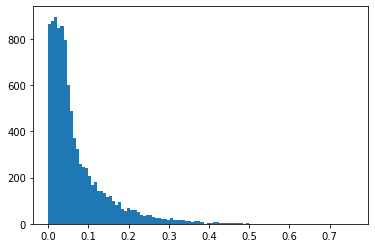

In [77]:
M=10000
t=np.zeros((M,1))
for i in range(M):
    t[i]=singel(mu,sigma,T,Lambda)
plt.hist(t,bins=100)

In [78]:
mu=(1/10)
sigma=(1/80)
T=8
Lambda=(1/12)

(array([301., 279., 285., 254., 285., 275., 264., 268., 279., 268., 250.,
        303., 277., 281., 299., 267., 291., 290., 266., 298., 304., 279.,
        272., 286., 270., 283., 277., 275., 271., 265., 228., 230., 192.,
        194., 190., 145., 107., 105.,  60.,  54.,  44.,  30.,  21.,  10.,
          5.,   5.,   4.,   2.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          1.]),
 array([9.83851840e-06, 2.80736396e-03, 5.60488940e-03, 8.40241483e-03,
        1.11999403e-02, 1.39974657e-02, 1.67949911e-02, 1.95925166e-02,
        2.23900420e-02, 2.51875675e-02, 2.79850929e-02, 3.07826183e-02,
        3.35801438e-02, 3.63776692e-02, 3.91751947e-02, 4.19727201e-02,
        4.47702455e-02, 4.7567

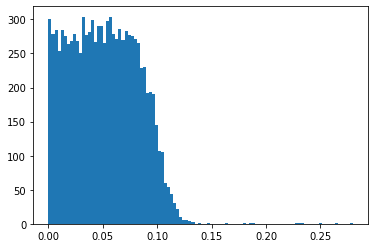

In [79]:
M=10000
t=np.zeros((M,1))
for i in range(M):
    t[i]=singel(mu,sigma,T,Lambda)
plt.hist(t,bins=100)

In [80]:
mu=(1/12)
sigma=(1/80)
T=8
Lambda=(1/12)

(array([764., 818., 766., 801., 753., 751., 777., 796., 746., 717., 650.,
        505., 405., 245., 124.,  58.,  31.,  31.,  14.,  20.,  17.,  15.,
         18.,  19.,  18.,   7.,  11.,   7.,   7.,  13.,   9.,   5.,   3.,
          8.,   5.,   3.,   6.,   8.,   4.,   2.,   2.,   1.,   2.,   4.,
          3.,   6.,   1.,   2.,   3.,   1.,   2.,   1.,   1.,   0.,   1.,
          1.,   3.,   0.,   1.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   1.,   1.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([2.36542573e-06, 6.73286216e-03, 1.34633589e-02, 2.01938556e-02,
        2.69243524e-02, 3.36548491e-02, 4.03853458e-02, 4.71158426e-02,
        5.38463393e-02, 6.05768360e-02, 6.73073328e-02, 7.40378295e-02,
        8.07683262e-02, 8.74988230e-02, 9.42293197e-02, 1.00959816e-01,
        1.07690313e-01, 1.1442

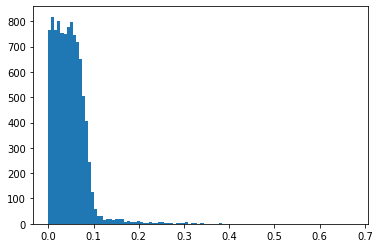

In [81]:
M=10000
t=np.zeros((M,1))
for i in range(M):
    t[i]=singel(mu,sigma,T,Lambda)
plt.hist(t,bins=100)

### Severs in series and parallel

is seris is just lite two server that every exit of one is arrivall to the others

parallel has the challenge

In [82]:
import numpy as np
import matplotlib.pyplot as plt

In [83]:
Lambda=(1/12)
Lambda_2=(1/20)

In [84]:
def singel_server(arrival):
    arrival+=np.random.exponential(Lambda)
    return arrival

In [85]:
def parallel_server(M,N):
    dic=[]
    time=np.zeros((N))
    t=0
    for i in range(M):
        t+=np.random.exponential(Lambda_2)
        a=time.argmin()
        if(t<time[a]):
            t=time[a]
        time[a]=singel_server(time[a])
        dic.append([a,time[a]])
    return dic

In [86]:
A=np.array(parallel_server(2000,3))

(array([ 8.,  5.,  1.,  6.,  2.,  5.,  9.,  4.,  5.,  5.,  7.,  1.,  4.,
         9.,  5.,  3.,  6.,  5., 10.,  5.,  9.,  7.,  6.,  9.,  5.,  7.,
         4.,  6.,  8.,  8.,  7.,  6.,  6.,  4.,  4., 10.,  6.,  5.,  4.,
         5.,  6.,  3.,  7.,  8.,  9.,  2.,  9., 11.,  8.,  7., 11.,  4.,
         4.,  9.,  6.,  3.,  2.,  5.,  9.,  0.,  5.,  3.,  6.,  8.,  6.,
         1.,  5.,  5.,  6.,  9.,  5.,  9.,  7.,  7.,  4.,  7., 10.,  8.,
         1., 13.,  8., 10.,  5.,  8.,  4.,  8.,  6.,  7.,  3.,  9.,  8.,
         5.,  7., 11.,  5.,  7.,  4.,  7., 11., 12.]),
 array([ 0.19512902,  0.75688977,  1.31865051,  1.88041126,  2.442172  ,
         3.00393275,  3.56569349,  4.12745424,  4.68921498,  5.25097573,
         5.81273647,  6.37449722,  6.93625796,  7.49801871,  8.05977945,
         8.6215402 ,  9.18330094,  9.74506169, 10.30682243, 10.86858318,
        11.43034392, 11.99210467, 12.55386541, 13.11562616, 13.6773869 ,
        14.23914765, 14.8009084 , 15.36266914, 15.92442989, 16.486190

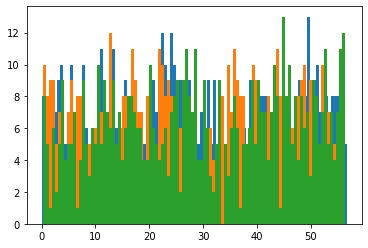

In [87]:
plt.hist(A[A[:,0]==0,1],bins=100)
plt.hist(A[A[:,0]==1,1],bins=100)
plt.hist(A[A[:,0]==2,1],bins=100)

### Inventory Model

In [88]:
import seaborn as sb

In [89]:
Lambda=3
g=5
C=200
c=2000
T=5
f=300
k=10
l=1

In [90]:
def costumer(t):
    t+=np.random.exponential(Lambda)
    buy=np.random.randint(g)+1
    return buy,t

In [91]:
def delivery(S_,x,t):
    t+=l
    return S_-x,t

In [92]:
def delivery_price(ware):
    return ware*C+c

In [93]:
def sell_price(sell):
    return sell*f

In [94]:
def refrigetator(capasity,time):
    return capasity*time*k

In [95]:
def inventory(S_,s):
    t=0.0
    capasity=S_
    Delivery_price=0
    Total_sell=0.0
    deliver_time=T
    costumer_time=0.0
    refrigetator_price=0.0
    buy=0
    ware=0
    deliver=False
    while(t<T):
        if(capasity<s and (not deliver)):
            if(capasity==0):
                capasity,t=delivery(S_,capasity,t)
                Delivery_price+=delivery_price(capasity)
            ware,deliver_time=delivery(S_,capasity,t)
            deliver=True
        if(costumer_time>deliver_time):
            refrigetator_price+=refrigetator(capasity,deliver_time-t)
            t=deliver_time
            deliver=False
            capasity+=ware
            Delivery_price+=delivery_price(ware)
        else:
            refrigetator_price+=refrigetator(capasity,costumer_time-t)
            t=costumer_time
            sell=min(capasity,buy)
            Total_sell+=sell_price(sell)
            capasity-=sell
            buy,costumer_time=costumer(costumer_time)
    return Total_sell-Delivery_price-refrigetator_price

### An Insurance Risk Model

with exponentioal disterbution with parameter $$\alpha$$ we get new costumer with exponentioal disterbution with parameter $$\lambda$$ we should pay for costumer and with exponentioal disterbution with parameter $$\mu$$ we lose one of our customer

so we genetare exponential  with parameter $$\alpha +n*\lambda +n*\mu $$
and with probabaility $$\frac{\alpha}{\alpha +n*\lambda +n*\mu}$$ we remain it as new customer
with probability $$\frac{n*\lambda}{\alpha +n*\lambda +n*\mu}$$ we remain it as pay
and with probability $$\frac{n*\mu}{\alpha +n*\lambda +n*\mu}$$ we remain it as losing a customer

In [96]:
def model(a_0,n_0):
    t,a,n=0,a_0,n_0
    t_E,b=0,1
    
    while(t<T):
        t_E=np.random.exponential(kapa+n*Lambda+n*mu)
        a+=min((t_E-t)*c,(T-t)*c)
        k=np.random.random()
        if(k<kapa/(kapa+n*Lambda+n*mu)):
            n+=1
        elif(k<n*Lambda/(kapa+n*Lambda+n*mu)):
            n-=1
        else:
            a-=np.random.normal(sigma,variance)
        t+=t_E
        if(a<0):
            b=0
    return b

In [97]:
kapa=5
Lambda=2
mu=4
sigma=300
variance=40
T=365
c=2

In [98]:
M=100000
A=np.zeros((M))
for i in range(M):
    A[i]=model(1000,100)

(array([ 1115.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 98885.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

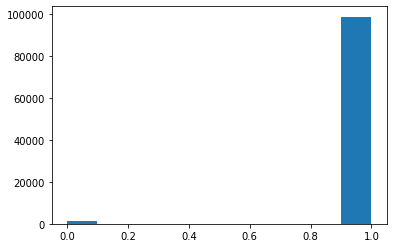

In [99]:
plt.hist(A)

In [101]:
import statsmodels.stats.api as sms

sms.DescrStatsW(A).tconfint_mean()

(0.9881991840892476, 0.9895008159107525)

### Markov Processes

make a line with 10 number with markov rule fool with 0 and 1 we can change a 1 to 0 and we can change 0 to 1 if we don't have two side 1

In [102]:
def game(n):
    a=np.random.randn((10))
    a[a>0.5]=1
    a[a<=0.5]=0
    for i in range(n):
        c=np.random.randint(10)
        if(a[c]==1):
            a[c]=0
        else:
            
            if(c!=0 and c!=9):
                if(a[c-1]==0 and a[c+1]==0):
                    a[c]=1
                    
            else:
                if(c==0):
                    if(a[c+1]==0):
                        a[c]=1
                else:
                    if(a[c-1]==0 ):
                        a[c]=1       
    return a

In [103]:
game(10)

array([0., 0., 1., 0., 0., 1., 0., 0., 0., 0.])

In [104]:
final=np.zeros((10))
for i in range(10000):
    final+=game(1000)
final/=10000

<BarContainer object of 10 artists>

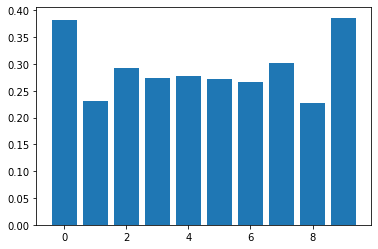

In [105]:
plt.bar([i for i in range(10)],final)

make random permutation of 1 to n with condition that $$\sum i*a_{i}>T$$

In [106]:
def permutaion(n):
    a=np.zeros((n))
    for i in range(n):
        b=int(np.random.randint(i+1))
        a[i]=a[b]
        a[b]=i+1
    return a

In [107]:
permutaion(10)

array([ 3.,  6.,  4.,  7.,  9.,  8., 10.,  1.,  2.,  5.])

In [108]:
def markove_permutation(n,T):
    perm=permutaion(n)
    score=np.array([i+1 for i in range(n)])
    while((score*perm).sum() <T):
        for i in range(1000):
            a=np.random.randint(n)
            b=np.random.randint(n)
            #if(a*perm[a]+b*perm[b]<a*perm[b]+b*perm[a]):
            c=perm[a]
            perm[a]=perm[b]
            perm[b]=c
    return perm

In [109]:
score=np.array([i+1 for i in range(10)])
S=np.zeros((1000))
T=np.zeros((10))
for i in range(1000):
    x=markove_permutation(10,192)
    S[i]=(x*score).sum()
    T+=x
T/=1000

(array([  7.,  17.,  28.,  38.,  43.,  66.,  68., 107.,  83.,  82., 107.,
         76.,  77.,  55.,  54.,  46.,  21.,  10.,   7.,   8.]),
 array([238., 245., 252., 259., 266., 273., 280., 287., 294., 301., 308.,
        315., 322., 329., 336., 343., 350., 357., 364., 371., 378.]),
 <BarContainer object of 20 artists>)

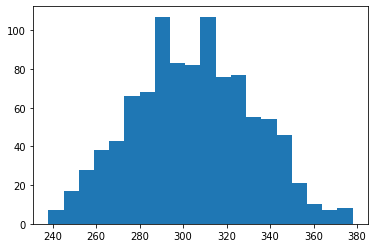

In [110]:
plt.hist(S,bins=20)

<BarContainer object of 10 artists>

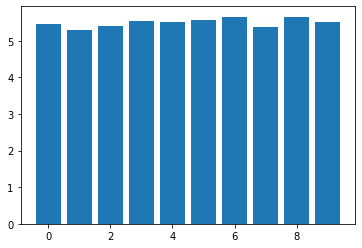

In [111]:
plt.bar([i for i in range(10)],T)

chose a permutaion with prabality with realate to sum(ai*i)

In [112]:
def Hastings_Metropolis(n):
    perm=permutaion(n)
    score=np.array([i+1 for i in range(n)])
    for i in range(1000):
        a=np.random.randint(n)
        b=np.random.randint(n)
        c=np.random.random()
        k=(perm*score).sum()
        l=k-(a*perm[a]+b*perm[b]-a*perm[b]-b*perm[a])
        if(c>k/l):
            c=perm[a]
            perm[a]=perm[b]
            perm[b]=c
    return perm

In [113]:
score=np.array([i+1 for i in range(10)])
S=np.zeros((5000))
T=np.zeros((10))
for i in range(5000):
    x=Hastings_Metropolis(10)
    S[i]=(x*score).sum()
    T+=x
T/=5000

(array([  1.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   5.,   0.,   4.,
          0.,   3.,   0.,   4.,   0.,   4.,   0.,   6.,   0.,   6.,   0.,
          7.,   0.,  11.,   0.,  16.,   0.,  18.,   0.,  30.,   0.,  16.,
          0.,  27.,   0.,  35.,   0.,  34.,   0.,  53.,   0.,  55.,   0.,
         66.,   0.,  68.,   0.,  95.,   0.,   0., 104.,   0., 125.,   0.,
        127.,   0., 127.,   0., 166.,   0., 187.,   0., 198.,   0., 194.,
          0., 245.,   0., 246.,   0., 271.,   0., 259.,   0., 270.,   0.,
        281.,   0., 285.,   0., 268.,   0., 224.,   0., 208.,   0., 170.,
          0., 157.,   0., 121.,   0., 101.,   0.,  56.,   0.,  33.,   0.,
         11.]),
 array([335.  , 335.49, 335.98, 336.47, 336.96, 337.45, 337.94, 338.43,
        338.92, 339.41, 339.9 , 340.39, 340.88, 341.37, 341.86, 342.35,
        342.84, 343.33, 343.82, 344.31, 344.8 , 345.29, 345.78, 346.27,
        346.76, 347.25, 347.74, 348.23, 348.72, 349.21, 349.7 , 350.19,
        350.68, 351.17, 351.66

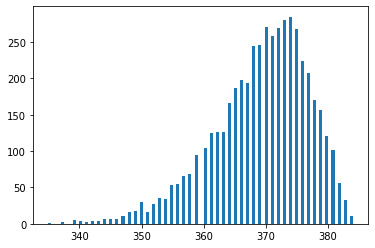

In [114]:
plt.hist(S,bins=100)

<BarContainer object of 10 artists>

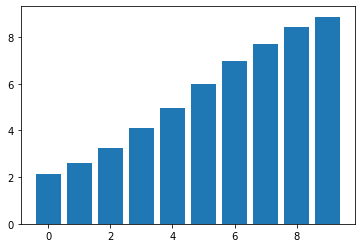

In [115]:
plt.bar([i for i in range(10)],T)

## Variance Reduction

### Anthetic Vairiables

In [132]:
n=100

In [160]:
A=np.array([np.random.uniform() for i in range(n)])
B=1-A

A=np.exp(A)
B=np.exp(B)

def conv(A,B):
     return (A*B).mean()-A.mean()*B.mean()

In [165]:
(np.var(A)+np.var(B)+2*conv(A,B))/4

0.003533719920687517

In [166]:
np.var(A)

0.21455329930667397

### Control Variate 

In [167]:
X=np.array([np.random.uniform() for i in range(n)])
Y=np.exp(X)

C=conv(X,Y)/(-np.var(X))

In [168]:
np.var(Y+C*(X-1/2))


0.0036372549959119843

In [169]:
np.var(Y)

0.24568491487821528

### Conditioning

In [170]:
X=np.array([2*np.random.uniform()-1 for i in range(n)])
Y=np.array([2*np.random.uniform()-1 for i in range(n)])

In [173]:
Z=X*X+Y*Y
Z[Z<=1]=1
Z[Z>1]=0

In [174]:
Z.var()

0.1771

In [175]:
T=np.sqrt(1-X*X)
T.var()

0.03521378169510789

### Gibbs Sampler 

generateing a random sample than  change one of the samples

genetate a x1 to xn with condition sum xi>c(xi exp with lambdai )

In [116]:
import numpy as np
import matplotlib.pyplot as plt

In [117]:
n=100
c=200
lmabda=np.abs(np.random.rand((n)))
def Gibbs_sampel():
    X=np.array([np.exp(lmabda[i]) for i in range(n)])
    a=np.random.randint(n)
    t=c-X.sum()+X[a]
    X[a]=t+np.exp(lmabda[a])
    return X

In [118]:
final_x=np.zeros((n))
for i in range(100):
    final_x+=Gibbs_sampel()
final_x/=100

<BarContainer object of 100 artists>

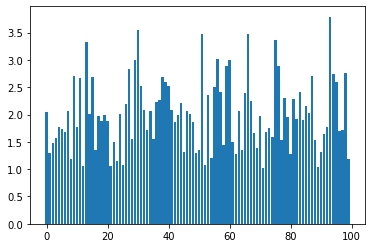

In [119]:
plt.bar([i for i in range(n)],final_x)

In [120]:
a=3
np.exp(3)

20.085536923187668